# Домашнее задание №1
Тарасюк Юлия, ММКТ
#### II. Экспоненциальное распределение, распределение Пуассона, парадокс средних

### Пункт 1

In [112]:
from scipy.stats import uniform, expon, poisson
import numpy as np
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Распределение расстояний')

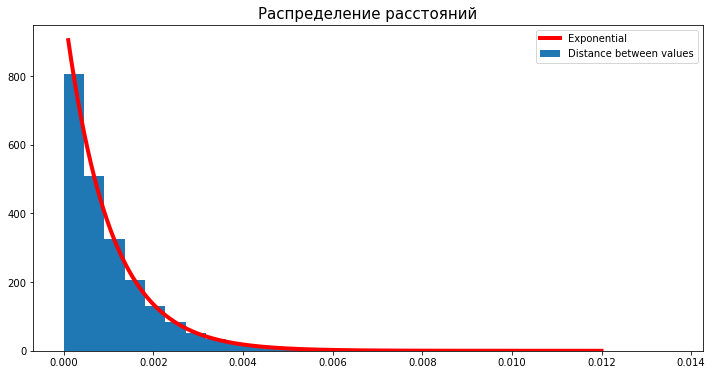

In [104]:
'''
Генерируем СВ, равномерно распределённую на отрезке
'''
sample = uniform.rvs(loc=0, scale=1000, size=10**6)
sample_sort = np.sort(sample)
sample_diff = np.diff(sample_sort)

plt.figure(figsize=(12, 6))
x = np.linspace(0.0001, 0.012, 1000)
plt.plot(x, expon.pdf(x, scale=0.001),
       'r-', lw=4, label='Exponential')

plt.hist(sample_diff, bins=30, density=True, label='Distance between values')
plt.legend(loc='upper right')
plt.title(r'Распределение расстояний', fontsize=15)

In [105]:
print('Математическое ожидание', np.mean(sample_diff))
print('Дисперсия', np.var(sample_diff))

Математическое ожидание 0.0009999976532766386
Дисперсия 1.0026834078668586e-06


### Пункт 2

Математическое ожидание 999.000999000999
Дисперсия 2001.8671318691295


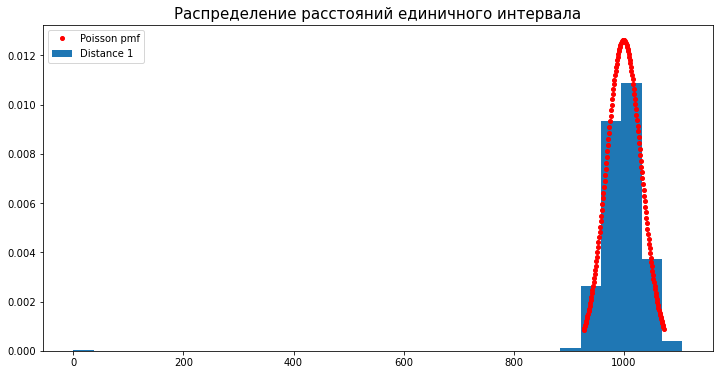

In [132]:
"""
Находит индексы элементов в отсортированном массиве, чтобы значения попадали
в интервалы, которые образуют переданные числа
""" 
split_at = sample_sort.searchsorted(np.linspace(1, 1000, 1000))
array_split = np.split(sample_sort, split_at)
array_count = [len(array) for array in array_split]
plt.figure(figsize=(12, 6))

x = np.arange(poisson.ppf(0.01, mu=1000),
              poisson.ppf(0.99, mu=1000))
plt.plot(x, poisson.pmf(x, mu=1000),
       'ro', ms=4, label='Poisson pmf')

plt.hist(array_count, bins=30, density=True, label = 'Distance 1')
plt.title(r'Распределение расстояний единичного интервала', fontsize=15)
plt.legend(loc='best')
print('Математическое ожидание', np.mean(array_count))
print('Дисперсия', np.var(array_count))

Математическое ожидание 99.9900009999
Дисперсия 179.94250575942306


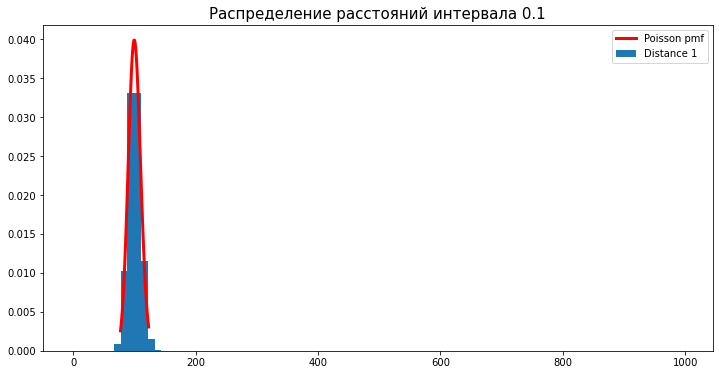

In [144]:
split_at = sample_sort.searchsorted(np.linspace(1, 1000, 10000))
array_split = np.split(sample_sort, split_at)
array_count = [len(array) for array in array_split]

plt.figure(figsize=(12, 6))
x = np.arange(poisson.ppf(0.01, mu=100),
              poisson.ppf(0.99, mu=100))
plt.plot(x, poisson.pmf(x, mu=100),
       'r-', lw=3, label='Poisson pmf')

plt.hist(array_count, bins=90, density=True,label = 'Distance 1')
plt.title(r'Распределение расстояний интервала 0.1', fontsize=15)
plt.legend(loc='best')
print('Математическое ожидание', np.mean(array_count))
print('Дисперсия', np.var(array_count))

Математическое ожидание 9.99990000099999
Дисперсия 19.68792311076899


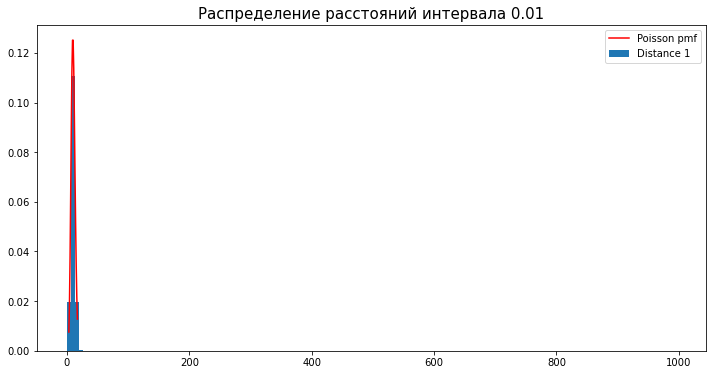

In [142]:
split_at = sample_sort.searchsorted(np.linspace(1, 1000, 100000))
array_split = np.split(sample_sort, split_at)
array_count = [len(array) for array in array_split]
plt.figure(figsize=(12, 6))

x = np.arange(poisson.ppf(0.01, mu=10),
              poisson.ppf(0.99, mu=10))
plt.plot(x, poisson.pmf(x, mu=10),
       'r-', ms=3, label='Poisson pmf')

plt.hist(array_count, bins=150, density=True, label = 'Distance 1')
plt.title(r'Распределение расстояний интервала 0.01', fontsize=15)
plt.legend(loc='best')
print('Математическое ожидание', np.mean(array_count))
print('Дисперсия', np.var(array_count))

Математическое ожидание 0.999999000001
Дисперсия 1.9869030130959864


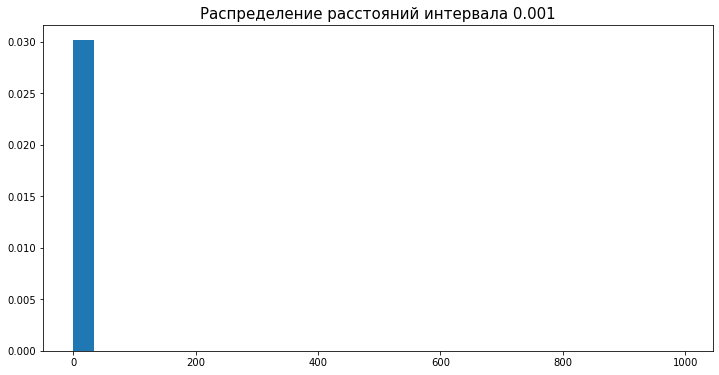

In [143]:
split_at = sample_sort.searchsorted(np.linspace(1, 1000, 1000000))
array_split = np.split(sample_sort, split_at)
array_count = [len(array) for array in array_split]
plt.figure(figsize=(12, 6))

plt.hist(array_count, bins=30, density=True)
plt.title(r'Распределение расстояний интервала 0.001', fontsize=15)
print('Математическое ожидание', np.mean(array_count))
print('Дисперсия', np.var(array_count))

В распределении Пуассона математическое ожидание и дисперсия = $\lambda$. 

В моей сгенерированной выборке для разных длин отрезков дисперсия всегда почти в 2 раза превосходит математическое ожидание. 

Ожидала то, что распределение Пуассона будет не так хорошо описывать выборку, и графики не будут накладываться. 

### Пункт 3

In [81]:
new_sample = uniform.rvs(loc=0, scale=1000, size=10**5) #генерация значений из равномерного распределения
new_sample_sort = np.sort(new_sample) # сортировка массива
new_split_at = new_sample_sort.searchsorted(sample_sort) # возвращает индексы элементов, разбивающих массив
new_array_split = np.split(new_sample_sort, new_split_at) #разбивает массив

In [82]:
new_array_count = [len(array) for array in new_array_split][1:-1]

Математическое ожидание 0.1000001000001
Дисперсия 0.10996809996808994


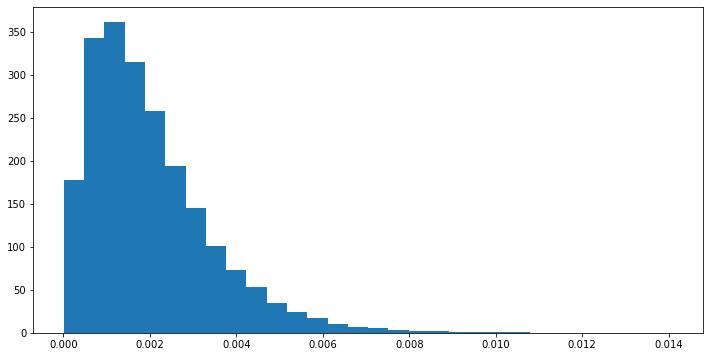

In [91]:
plt.figure(figsize=(12, 6))
plt.hist(np.repeat(sample_diff, new_array_count), bins=30, density=True);
print('Математическое ожидание', np.mean(new_array_count))
print('Дисперсия', np.var(new_array_count))

In [120]:
print('Нахождение лямбды из мат.ожидания',1/(np.mean(new_array_count)))
print('Нахождение лямбды из диспресии',1/(np.var(new_array_count)**0.5))

Нахождение лямбды из мат.ожидания 9.99999
Нахождение лямбды из диспресии 3.0155507327769198


### Вывод

Распределение в пункте №1 хорошо описывается экспоненциальным распределением. Распределение, полученное в пункте №3, не описывается экспоненциальным. Мы получаем разные значения параметров распределения при нахождении лямбды из дисперсии и математического ожидания. 

Возможно, различие ответов в пункте 1 и 3 связано с разными подходами в проведении экспериментов. В ходе проведения исследования 3 мы удаляли некоторые наблюдения и дублировали другие. Например, мы удаляли длины отрезков, куда не попало ни одно значение. В итоге распределение получилось другим.  